In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\75833\Downloads\movies.csv')

In [3]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
data.shape

(7668, 15)

Dataset have 7668 rows and 15 columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
data.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
data.drop(['name','score','votes','gross','released'],axis=1,inplace=True)

Here name,score,votes,grosss,released don't have much influence on 'budget'. So we can drop these informations.

# Preprocessing

# Checking and handling missing values

In [8]:
data.isnull().sum()

rating        77
genre          0
year           0
director       0
writer         3
star           1
country        3
budget      2171
company       17
runtime        4
dtype: int64

In [9]:
data['budget'] = data['budget'].fillna(data['budget'].median())
data['runtime'] = data['runtime'].fillna(data['runtime'].median())
for i in ['company','writer', 'star', 'country','rating']:
         data[i]=data[i].fillna(data[i].mode().iloc[0])

In [10]:
data.isnull().sum()

rating      0
genre       0
year        0
director    0
writer      0
star        0
country     0
budget      0
company     0
runtime     0
dtype: int64

# Exploratory Data Analysis

# univariate analysis

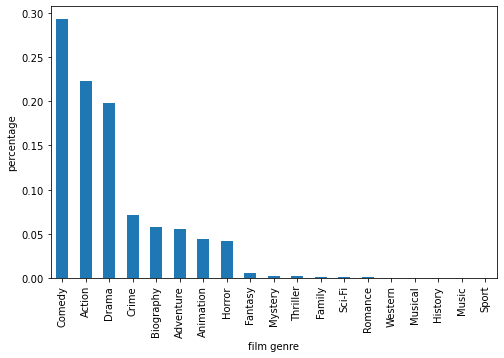

In [11]:
plt.figure(figsize=(8,5))
data.genre.value_counts(normalize = True).plot.bar()
plt.xlabel('film genre')
plt.ylabel('percentage')
plt.show()

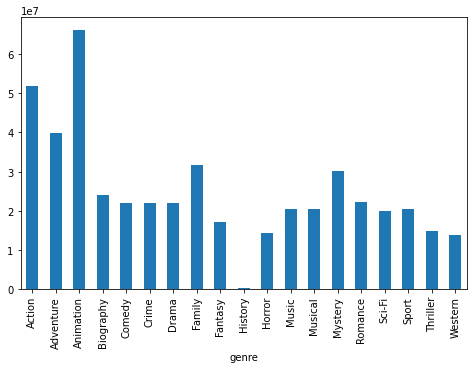

In [12]:
plt.figure(figsize = (8,5))
data.groupby('genre')['budget'].mean().plot.bar()
plt.show()

# Bivariate analysis

         year  budget  runtime
year     1.00    0.29     0.12
budget   0.29    1.00     0.27
runtime  0.12    0.27     1.00


<AxesSubplot:>

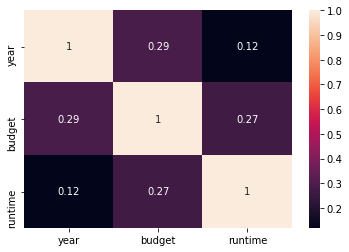

In [13]:
corr_matrix = data.corr().round(2)
print(corr_matrix)
sns.heatmap(corr_matrix,annot = True)

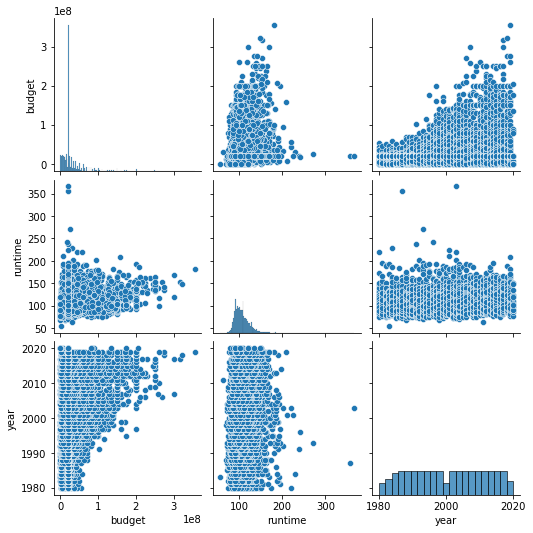

In [14]:
sns.pairplot(data[['budget','runtime','year']])

# Outlier detection & handling

Text(0.5, 1.0, 'Boxplot of budget')

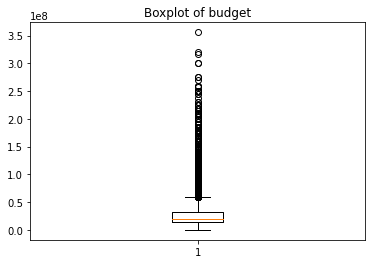

In [15]:
plt.boxplot(data['budget'])
plt.title('Boxplot of budget')

In [16]:
Q1=np.percentile(data['budget'],25,interpolation='midpoint')
Q2=np.percentile(data['budget'],50,interpolation='midpoint')
Q3=np.percentile(data['budget'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('lower limit:',low_lim)
print('upper limit:',up_lim)

lower limit: -13000000.0
upper limit: 59000000.0


In [17]:
Outlier = []
for x in data['budget']:
    if ((x>up_lim) or (x<low_lim)):
        Outlier.append(x)

In [18]:
Outlier

[70000000.0,
 63000000.0,
 70000000.0,
 65000000.0,
 70000000.0,
 60000000.0,
 102000000.0,
 70000000.0,
 65000000.0,
 80000000.0,
 60000000.0,
 63000000.0,
 85000000.0,
 70000000.0,
 115000000.0,
 60000000.0,
 62000000.0,
 75000000.0,
 63000000.0,
 60000000.0,
 70000000.0,
 65897768.0,
 60000000.0,
 60000000.0,
 72000000.0,
 65000000.0,
 100000000.0,
 90000000.0,
 175000000.0,
 60000000.0,
 98000000.0,
 90000000.0,
 62000000.0,
 60000000.0,
 68000000.0,
 80000000.0,
 75000000.0,
 80000000.0,
 92000000.0,
 75000000.0,
 75000000.0,
 70000000.0,
 65000000.0,
 100000000.0,
 100000000.0,
 80000000.0,
 67000000.0,
 80000000.0,
 60000000.0,
 60000000.0,
 200000000.0,
 93000000.0,
 62000000.0,
 105000000.0,
 75000000.0,
 90000000.0,
 90000000.0,
 85000000.0,
 125000000.0,
 60000000.0,
 85000000.0,
 116000000.0,
 73000000.0,
 80000000.0,
 75000000.0,
 110000000.0,
 160000000.0,
 68000000.0,
 70000000.0,
 75000000.0,
 60000000.0,
 90000000.0,
 80000000.0,
 90000000.0,
 80000000.0,
 60000000.0,


In [19]:
median=data.loc[data['budget']>up_lim,'budget'].median()
data.loc[data.budget>up_lim,'budget']=np.nan
data.fillna(median,inplace=True)

Text(0.5, 1.0, 'Boxplot of budget')

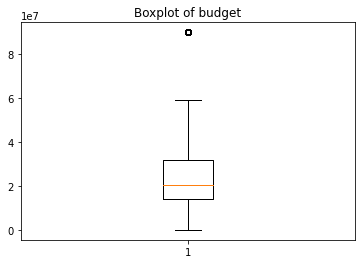

In [20]:
plt.boxplot(data['budget'])
plt.title('Boxplot of budget')

Text(0.5, 1.0, 'Boxplot of runtime')

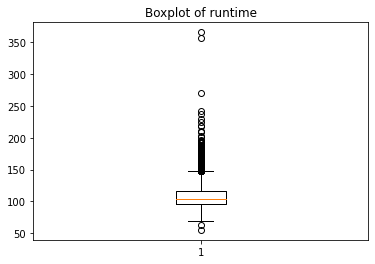

In [21]:
plt.boxplot(data['runtime'])
plt.title('Boxplot of runtime')

In [22]:
Q1=np.percentile(data['runtime'],25,interpolation='midpoint')
Q2=np.percentile(data['runtime'],50,interpolation='midpoint')
Q3=np.percentile(data['runtime'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('lower limit:',low_lim)
print('upper limit:',up_lim)

lower limit: 63.5
upper limit: 147.5


In [23]:
Outliers = []
for x in data['runtime']:
    if ((x>up_lim) or (x<low_lim)):
         Outliers.append(x)

In [24]:
Outliers

[219.0,
 173.0,
 150.0,
 149.0,
 195.0,
 155.0,
 167.0,
 150.0,
 191.0,
 188.0,
 170.0,
 193.0,
 55.0,
 229.0,
 160.0,
 164.0,
 153.0,
 187.0,
 154.0,
 162.0,
 161.0,
 185.0,
 149.0,
 153.0,
 163.0,
 157.0,
 157.0,
 357.0,
 155.0,
 164.0,
 168.0,
 171.0,
 161.0,
 175.0,
 162.0,
 181.0,
 158.0,
 189.0,
 238.0,
 158.0,
 189.0,
 158.0,
 156.0,
 202.0,
 154.0,
 160.0,
 182.0,
 195.0,
 154.0,
 180.0,
 271.0,
 188.0,
 171.0,
 154.0,
 191.0,
 159.0,
 170.0,
 178.0,
 178.0,
 192.0,
 167.0,
 176.0,
 149.0,
 162.0,
 242.0,
 159.0,
 155.0,
 194.0,
 154.0,
 150.0,
 155.0,
 155.0,
 177.0,
 169.0,
 151.0,
 178.0,
 170.0,
 169.0,
 169.0,
 177.0,
 172.0,
 159.0,
 189.0,
 188.0,
 157.0,
 162.0,
 148.0,
 162.0,
 148.0,
 181.0,
 160.0,
 155.0,
 165.0,
 154.0,
 173.0,
 186.0,
 172.0,
 152.0,
 178.0,
 183.0,
 157.0,
 224.0,
 152.0,
 183.0,
 210.0,
 150.0,
 161.0,
 179.0,
 167.0,
 185.0,
 201.0,
 154.0,
 154.0,
 178.0,
 219.0,
 186.0,
 366.0,
 163.0,
 170.0,
 156.0,
 175.0,
 152.0,
 189.0,
 192.0,
 186.0,
 

In [25]:
median = data.loc[data['runtime']>up_lim, 'runtime'].median()
data["runtime"] = np.where(data["runtime"] >up_lim, median,data['runtime'])
data.fillna(median,inplace=True)
lo_med =median = data.loc[data['runtime']<low_lim, 'runtime'].median()
data["runtime"] = np.where(data["runtime"] <low_lim, lo_med,data['runtime'])
data.fillna(lo_med,inplace=True)

Text(0.5, 1.0, 'Boxplot of runtime')

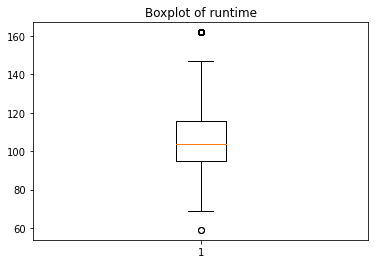

In [26]:
plt.boxplot(data['runtime'])
plt.title('Boxplot of runtime')

In [27]:
data.drop(['director','writer','star', 'country'],axis=1,inplace=True)

In [28]:
y=data['budget']
x=data.drop(['budget'],axis=1)

# Encoding

# Label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['rating','year']
for i in np.arange(len(a)):
    x[a[i]]=label_en.fit_transform(x[a[i]])

In [30]:
x.columns

Index(['rating', 'genre', 'year', 'company', 'runtime'], dtype='object')

# One-hot Encoding

In [31]:
company_dummies = pd.get_dummies(x['company'],drop_first=True)
x=pd.concat([x.drop('company',axis=1),company_dummies],axis=1)
genre_dummies = pd.get_dummies(x['genre'],drop_first = True)
x = pd.concat([x.drop('genre',axis = 1),genre_dummies],axis=1)

In [32]:
x.head()

,rating,year,runtime,"""Weathering With You"" Film Partners",.406 Production,1+2 Seisaku Iinkai,10 West Studios,120 Films,120dB Films,13 Productions,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Western
0,6,0,146.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,104.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,124.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,88.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,98.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Standard Scaling

In [33]:
from sklearn.preprocessing import StandardScaler 
standardisation = StandardScaler()
x=standardisation.fit_transform(x)

In [34]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,2395,2396,2397,2398,2399,2400,2401,2402,2403,2404
count,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,...,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03
mean,-6.081323e-16,3.341673e-17,-1.074381e-15,-4.306960e-16,3.531239e-16,3.531239e-16,6.005315e-16,3.549736e-16,-1.682934e-15,3.549736e-16,...,-2.297287e-16,9.752820e-17,-4.187656e-16,-2.032565e-15,9.857084e-16,-9.551657e-16,-9.982469e-16,-4.781534e-16,-1.621119e-15,3.199664e-15
std,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,...,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00
min,-4.542958e+00,-1.829629e+00,-2.767808e+00,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.615216e-02,-1.142056e-02,...,-1.142056e-02,-2.093642e-01,-1.142056e-02,-1.615216e-02,-5.113768e-02,-3.613619e-02,-3.613619e-02,-1.142056e-02,-4.572698e-02,-1.978356e-02
25%,-1.816637e-01,-8.433279e-01,-6.945318e-01,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.615216e-02,-1.142056e-02,...,-1.142056e-02,-2.093642e-01,-1.142056e-02,-1.615216e-02,-5.113768e-02,-3.613619e-02,-3.613619e-02,-1.142056e-02,-4.572698e-02,-1.978356e-02
50%,6.905951e-01,-3.635427e-02,-1.762128e-01,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.615216e-02,-1.142056e-02,...,-1.142056e-02,-2.093642e-01,-1.142056e-02,-1.615216e-02,-5.113768e-02,-3.613619e-02,-3.613619e-02,-1.142056e-02,-4.572698e-02,-1.978356e-02
75%,6.905951e-01,8.602831e-01,5.148791e-01,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.615216e-02,-1.142056e-02,...,-1.142056e-02,-2.093642e-01,-1.142056e-02,-1.615216e-02,-5.113768e-02,-3.613619e-02,-3.613619e-02,-1.142056e-02,-4.572698e-02,-1.978356e-02
max,5.051889e+00,1.756921e+00,3.164065e+00,8.756141e+01,8.756141e+01,8.756141e+01,8.756141e+01,8.756141e+01,6.191123e+01,8.756141e+01,...,8.756141e+01,4.776365e+00,8.756141e+01,6.191123e+01,1.955505e+01,2.767309e+01,2.767309e+01,8.756141e+01,2.186893e+01,5.054701e+01


Spliting the Dataset to x_train and y_train

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# Modelling

# Linear Regression model

In [36]:
from sklearn import linear_model
lr= linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test, y_pred))
print('MAE value is:',mean_absolute_error(y_test, y_pred))

MSE is: 1.6090672745989613e+44
R squared value is: -2.4360511846209374e+29
MAE value is: 4.2623672891081695e+21


# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)

In [39]:
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test, y_pred))
print('MAE value is:',mean_absolute_error(y_test, y_pred))

MSE is: 497317844047761.4
R squared value is: 0.24708448040021946
MAE value is: 13211113.417209908


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [41]:
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test, y_pred))
print('MAE value is:',mean_absolute_error(y_test, y_pred))

MSE is: 329256084791403.56
R squared value is: 0.5015219760779366
MAE value is: 11827183.557040313


# SVM

In [42]:
from sklearn.svm import SVR
model = SVR(kernel = 'linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [43]:
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test, y_pred))
print('MAE value is:',mean_absolute_error(y_test, y_pred))

MSE is: 726832587255025.8
R squared value is: -0.10038990485652954
MAE value is: 15514905.002907779


# kNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [45]:
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test, y_pred))
print('MAE value is:',mean_absolute_error(y_test, y_pred))

MSE is: 751530026718682.8
R squared value is: -0.1377806514165456
MAE value is: 16651380.093872229


Here,Random forest algorithm gives the best result to predict the model.

# Model Fine Tuning

In [46]:
from sklearn import set_config
set_config(print_changed_only = False)
rf=RandomForestRegressor(max_depth=10,min_samples_split=6)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [47]:
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test, y_pred))
print('MAE value is:',mean_absolute_error(y_test, y_pred))

MSE is: 325214517443032.56
R squared value is: 0.5076407164700549
MAE value is: 12328717.118372535


In [48]:
rf_tuned = RandomForestRegressor(max_depth=120,min_samples_split = 6,min_samples_leaf = 1,n_estimators=100,max_features='sqrt',bootstrap=True,random_state=222)
rf_tuned.fit(x_train,y_train)
y_pred=rf_tuned.predict(x_test)


print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test, y_pred))
print('MAE value is:',mean_absolute_error(y_test, y_pred))

MSE is: 297453746438514.44
R squared value is: 0.549669201020772
MAE value is: 12094954.827963982


Here, R2 score of 0.55 obtained, which is a reasonable value.